<IPython.core.display.Javascript object>


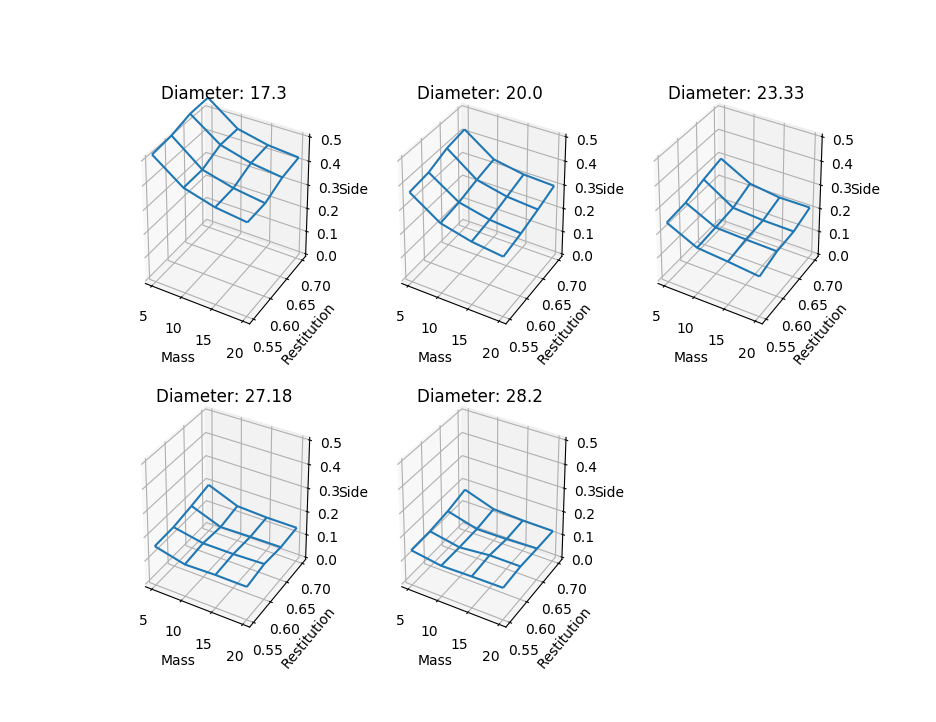

(0.0, 1.0, 0.0, 1.0)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook

fig, axes = plt.subplots(ncols=3, nrows=2, subplot_kw={'projection': '3d'})

axes = axes.flatten()
axes[-1].axis('off')

In [2]:
df = pd.read_csv("example_data/TSC 2018-02-11 10-26-38.csv")
df.set_index(["Diameter",
    "Thickness",
    "Mass",
    "Restitution"], inplace = True)

In [3]:
df.head()

Force  Force application Time  \
Diameter Thickness Mass Restitution                                  
17.3     10.0      5.0  0.55           1.0                    0.05   
                        0.60           1.0                    0.05   
                        0.65           1.0                    0.05   
                        0.70           1.0                    0.05   
                   10.0 0.55           1.0                    0.05   

                                     Lateral friction  Spinning friction  \
Diameter Thickness Mass Restitution                                        
17.3     10.0      5.0  0.55                      0.5             0.0005   
                        0.60                      0.5             0.0005   
                        0.65                      0.5             0.0005   
                        0.70                      0.5             0.0005   
                   10.0 0.55                      0.5             0.0005   

                                     Rolling friction  Distance between coins  \
Diameter Thickness Mass Restitution                                             
17.3     10.0      5.0  0.55                    0.002                    10.0   
                        0.60                    0.002                    10.0   
                        0.65                    0.002                    10.0   
                        0.70                    0.002                    10.0   
                   10.0 0.55                    0.002                    10.0   

                                     Linear damping  Angular damping  Heads  \
Diameter Thickness Mass Restitution                                           
17.3     10.0      5.0  0.55                   0.05             0.05  11863   
                        0.60                   0.05             0.05  11917   
                        0.65                   0.05             0.05  11340   
                        0.70                   0.05             0.05  11247   
                   10.0 0.55                   0.05             0.05  14322   

                                     Tails   Side  Total  
Diameter Thickness Mass Restitution                       
17.3     10.0      5.0  0.55         12085  26052  50000  
                        0.60         11624  26459  50000  
                        0.65         11062  27598  50000  
                        0.70         11005  27748  50000  
                   10.0 0.55         14194  21484  50000

In [4]:
df2 = df.copy()

In [5]:
df2.drop(["Force",
    "Force application Time",
    "Lateral friction",
    "Spinning friction",
    "Rolling friction",
    "Distance between coins",
    "Linear damping",
    "Angular damping"], axis=1, inplace=True)

In [6]:
df2.unstack().head()

Heads                       Tails                \
Restitution               0.55   0.60   0.65   0.70   0.55   0.60   0.65   
Diameter Thickness Mass                                                    
17.3     10.0      5.0   11863  11917  11340  11247  12085  11624  11062   
                   10.0  14322  14306  13438  13463  14194  14148  13410   
                   15.0  15042  15037  14454  14316  15231  15089  14136   
                   20.0  15476  15542  14722  14439  15587  15505  14764   
20.0     10.0      5.0   15769  15597  14788  14581  15758  15467  14723   

                                 Side                       Total         \
Restitution               0.70   0.55   0.60   0.65   0.70   0.55   0.60   
Diameter Thickness Mass                                                    
17.3     10.0      5.0   11005  26052  26459  27598  27748  50000  50000   
                   10.0  13411  21484  21546  23152  23126  50000  50000   
                   15.0  14012  19727  19874  21410  21672  50000  50000   
                   20.0  14494  18937  18953  20514  21067  50000  50000   
20.0     10.0      5.0   14298  18473  18936  20489  21121  50000  50000   

                                       
Restitution               0.65   0.70  
Diameter Thickness Mass                
17.3     10.0      5.0   50000  50000  
                   10.0  50000  50000  
                   15.0  50000  50000  
                   20.0  50000  50000  
20.0     10.0      5.0   50000  50000

In [7]:
xval, yval = np.array(df2.index.get_level_values("Mass")), np.array(df2.index.get_level_values("Restitution"))
xval = np.reshape(xval, [5,4,4])
yval = np.reshape(yval, [5,4,4])
zval = np.reshape(np.array(df2["Side"] / df2["Total"]), (5,4,4))

In [8]:
for n in range(5):
    axes[n].plot_wireframe(xval[n], yval[n], zval[n])
    axes[n].set_title("Diameter: " + str(round(df2.index.get_level_values("Diameter").unique()[n], 2)), y=1)
    axes[n].set_xlabel("Mass")
    axes[n].set_ylabel("Restitution")
    axes[n].set_zlabel("Side")
    axes[n].set_zlim([0.0, 0.5])